## Linear Regression Using Deep Neural Network

### Boston House Price Prediction 

#### COMPBEB1326

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



In [2]:
#load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe
house_df.shape

(506, 14)

In [4]:
#check there are any NAN values
house_df.isnull().values.any()

False

In [5]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


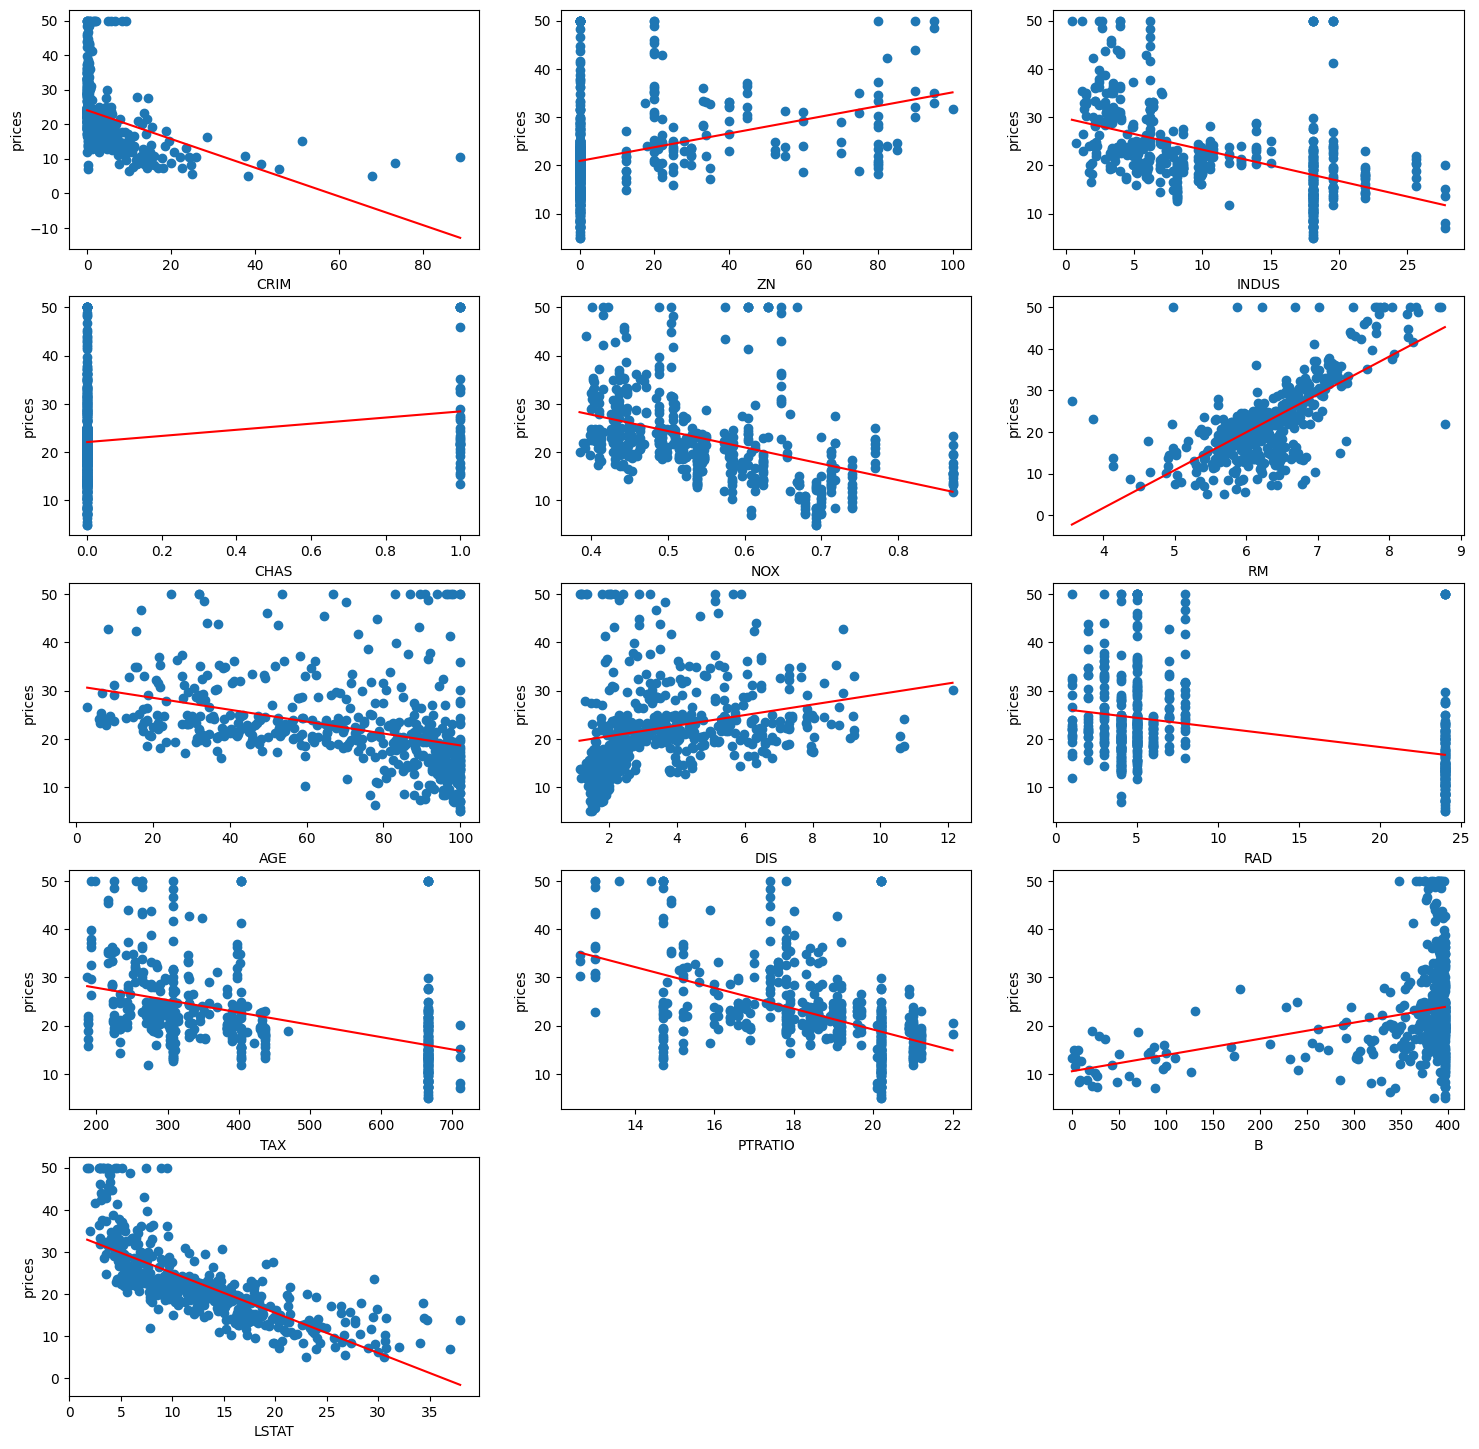

In [6]:
'''=== Show the linear relationship between features  and price (MEDV). Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label
    
   
    
    

In [7]:
# separate the training and target variable
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [8]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [9]:
'''==== Multi-Layer Perception architecture is used for prediction of house price ===='''

# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (404, 13)
testing data shape:  (102, 13)


In [10]:
'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Train

In [11]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300


2023-05-05 10:10:29.559762: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11/11 [==============================] - 1s 61ms/step - loss: 592.5356 - mae: 22.3852 - val_loss: 468.8613 - val_mae: 19.9818
Epoch 2/300
11/11 [==============================] - 0s 10ms/step - loss: 380.9241 - mae: 16.8198 - val_loss: 87.6669 - val_mae: 6.5193
Epoch 3/300
11/11 [==============================] - 0s 9ms/step - loss: 122.3292 - mae: 9.0459 - val_loss: 65.3504 - val_mae: 5.8257
Epoch 4/300
11/11 [==============================] - 0s 9ms/step - loss: 91.7518 - mae: 6.7782 - val_loss: 61.5151 - val_mae: 5.2486
Epoch 5/300
11/11 [==============================] - 0s 9ms/step - loss: 82.8558 - mae: 7.0688 - val_loss: 58.5683 - val_mae: 5.3607
Epoch 6/300
11/11 [==============================] - 0s 9ms/step - loss: 74.0501 - mae: 6.0770 - val_loss: 57.1692 - val_mae: 5.1131
Epoch 7/300
11/11 [==============================] - 0s 9ms/step - loss: 71.0254 - mae: 5.9507 - val_loss: 59.7654 - val_mae: 5.8519
Epoch 8/300
11/11 [==============================] - 0s 9ms/step - loss:

11/11 [==============================] - 0s 9ms/step - loss: 40.7861 - mae: 4.5736 - val_loss: 38.7867 - val_mae: 4.1741
Epoch 63/300
11/11 [==============================] - 0s 9ms/step - loss: 37.7767 - mae: 4.2589 - val_loss: 39.3313 - val_mae: 4.1611
Epoch 64/300
11/11 [==============================] - 0s 8ms/step - loss: 37.0708 - mae: 4.2647 - val_loss: 43.8254 - val_mae: 4.0964
Epoch 65/300
11/11 [==============================] - 0s 9ms/step - loss: 43.4287 - mae: 4.8133 - val_loss: 43.6389 - val_mae: 4.0146
Epoch 66/300
11/11 [==============================] - 0s 8ms/step - loss: 41.7639 - mae: 4.6218 - val_loss: 37.8828 - val_mae: 3.8454
Epoch 67/300
11/11 [==============================] - 0s 9ms/step - loss: 41.5395 - mae: 4.5269 - val_loss: 37.2922 - val_mae: 4.1632
Epoch 68/300
11/11 [==============================] - 0s 9ms/step - loss: 32.0337 - mae: 3.9250 - val_loss: 55.3883 - val_mae: 6.0998
Epoch 69/300
11/11 [==============================] - 0s 8ms/step - loss: 3

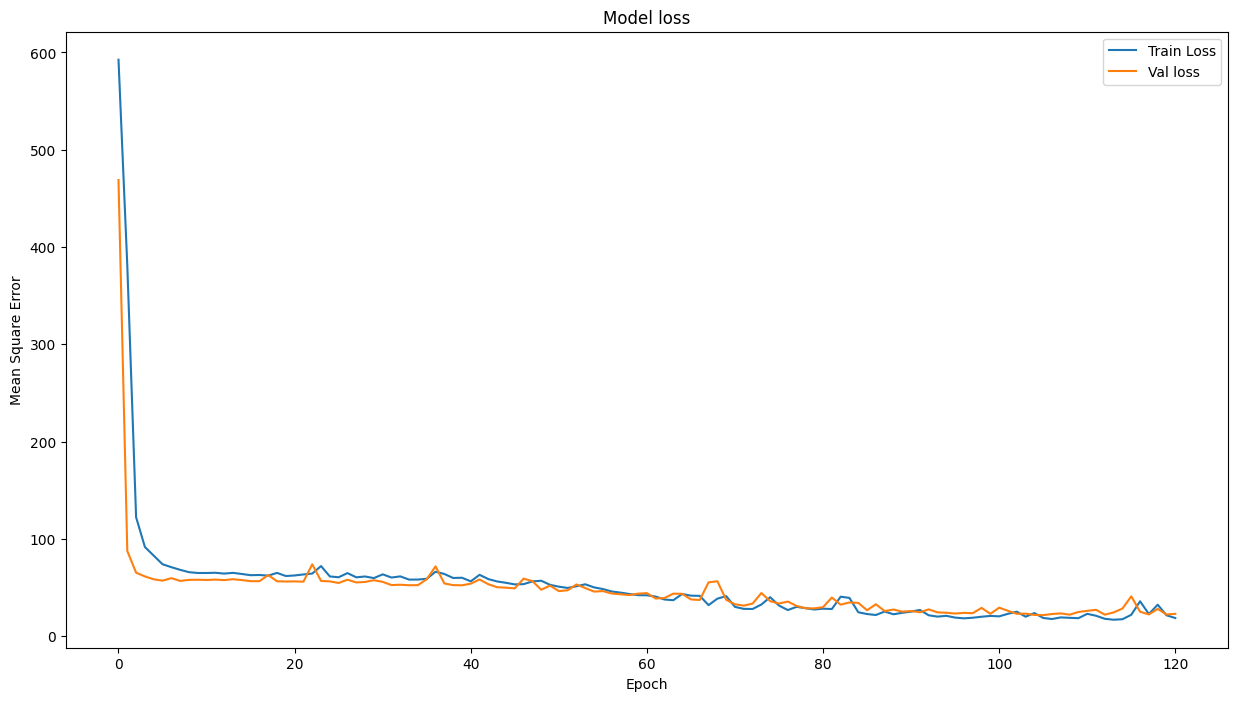

In [12]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()


In [13]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



4/4 [==============================] - 0s 29ms/step - loss: 18.0750 - mae: 2.9749
loss value:  18.075042724609375
Mean absolute error:  2.9749321937561035


In [14]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


4/4 [==============================] - 0s 6ms/step
[27.112467  39.58374   17.008163  26.58549   17.082418  18.686893
 17.24901   13.478449  23.36995   18.73857   19.406044  17.949411
  8.639731  18.323832  20.56815   24.627449  20.224863  11.16368
 43.850994  15.490693  29.68372   29.28121   14.358865  22.325504
 18.158016  15.266658  22.038103  11.790421  19.11965   18.577908
 20.577904  25.87037   16.941172  28.143053  14.366509  13.986207
 34.679695  23.86262   18.987715  22.245262  15.11605   35.001926
 47.83994   18.423573  25.622469  16.872154  15.873237  24.103418
 18.042162  35.426533  20.26948   38.79334   17.09886   27.665337
 44.192497  25.638256  18.105091  38.809986  23.61191   16.163174
 21.912039  36.973236  36.858196  15.487585  26.691563  16.74566
 16.65167   26.7539    36.133648  12.019     20.151794  31.043465
 12.823404  24.424475  20.35266   10.04386   20.035658  45.517773
 13.038994  14.014115  21.97687   12.1777    22.497072  12.191537
 21.524065  27.986073  19.0

In [15]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.6,27.112467
1,32.4,39.583740
2,13.6,17.008163
3,22.8,26.585489
4,16.1,17.082418
5,20.0,18.686893
6,17.8,17.249010
7,14.0,13.478449
8,19.6,23.369949
9,16.8,18.738569


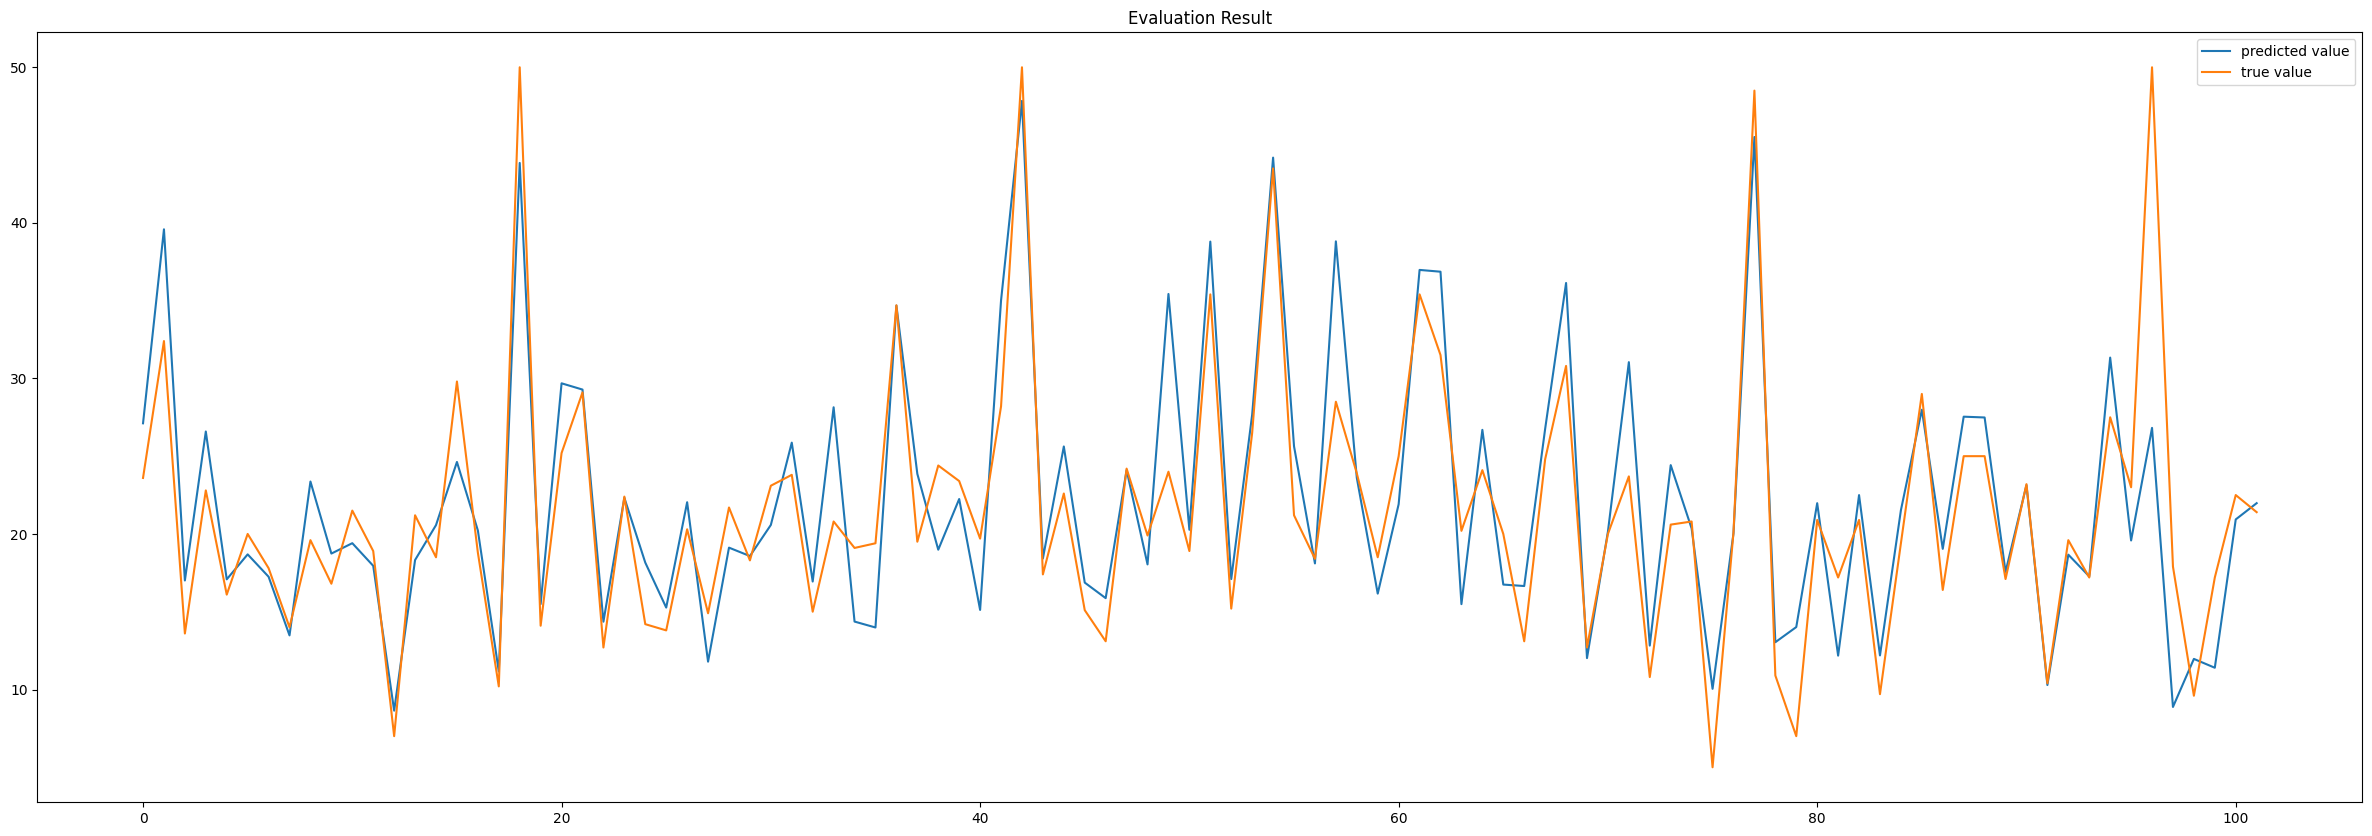

In [16]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

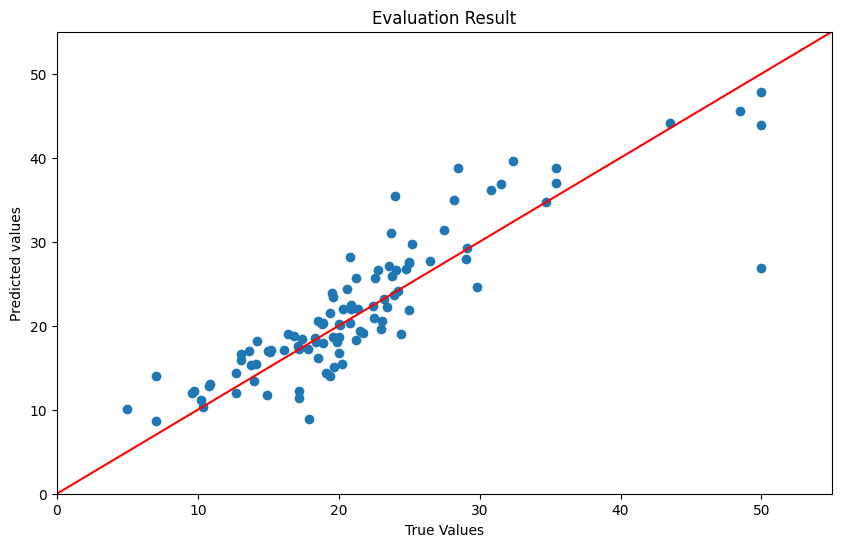

In [17]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

         ======= Remove outliers from the data set ========
  Tried to see the model perfomance after removing the outliers, the perfomance doesn't 
  show much improvemnt. This might be less data size after remoing the outliers.


In [18]:
#calcualtes quartiles and interquaterlies
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1

In [19]:
house_data = house_df.iloc[:,0:14]
house_data.shape


(506, 14)

In [20]:
#data after outliers remvoing
clean_data = house_df[~((house_data < (Q1 - 1.5 * IQR)) |(house_data > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(268, 14)

In [21]:
feature = clean_data.iloc[:,0:13] #  training variables
target = clean_data.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [22]:
#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [23]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (214, 13)
testing data shape:  (54, 13)


In [24]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               2100      
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 150)               22650     
                                                                 
 dense_9 (Dense)             (None, 150)               22650     
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-trai

In [25]:

#train model
early_stop = EarlyStopping(monitor='val_loss', patience=20) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300
6/6 [==============================] - 1s 112ms/step - loss: 486.3303 - mae: 21.4648 - val_loss: 433.3633 - val_mae: 20.4613
Epoch 2/300
6/6 [==============================] - 0s 13ms/step - loss: 455.3198 - mae: 20.7225 - val_loss: 376.9731 - val_mae: 19.0330
Epoch 3/300
6/6 [==============================] - 0s 11ms/step - loss: 369.7518 - mae: 18.5233 - val_loss: 236.5018 - val_mae: 14.8902
Epoch 4/300
6/6 [==============================] - 0s 11ms/step - loss: 184.7854 - mae: 12.3512 - val_loss: 27.1647 - val_mae: 4.1071
Epoch 5/300
6/6 [==============================] - 0s 11ms/step - loss: 50.8288 - mae: 6.0104 - val_loss: 82.5809 - val_mae: 8.3046
Epoch 6/300
6/6 [==============================] - 0s 10ms/step - loss: 48.8649 - mae: 5.8962 - val_loss: 15.8909 - val_mae: 3.0342
Epoch 7/300
6/6 [==============================] - 0s 11ms/step - loss: 35.1124 - mae: 4.5341 - val_loss: 25.5454 - val_mae: 3.9586
Epoch 8/300
6/6 [==============================] - 0s 11ms/st

In [26]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



2/2 [==============================] - 0s 29ms/step - loss: 16.4777 - mae: 2.9775
loss value:  16.47772979736328
Mean absolute error:  2.9774515628814697


In [27]:

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


2/2 [==============================] - 0s 17ms/step
[18.89421  24.134546 21.54379  18.692513 18.938522 22.79664  17.093348
 22.556793 22.796612 23.498066 18.591646 22.333132 23.313192 22.064262
 21.42861  23.105991 22.674446 22.861887 20.432987 18.957203 20.116367
 21.707932 20.09414  22.817904 23.739706 23.690336 20.68822  24.310452
 23.05128  19.25619  24.38734  23.120718 22.16495  17.165619 21.815348
 20.52994  18.713757 21.649601 24.411526 18.604479 21.16046  19.209154
 21.415333 17.144222 22.139017 20.19449  22.46116  22.281088 20.43465
 22.336155 17.027664 17.128588 23.066317 17.257221]


In [28]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.0,18.894211
1,18.7,24.134546
2,14.5,21.543791
3,19.1,18.692513
4,18.1,18.938522
5,23.3,22.796640
6,17.7,17.093348
7,23.2,22.556793
8,18.9,22.796612
9,28.0,23.498066


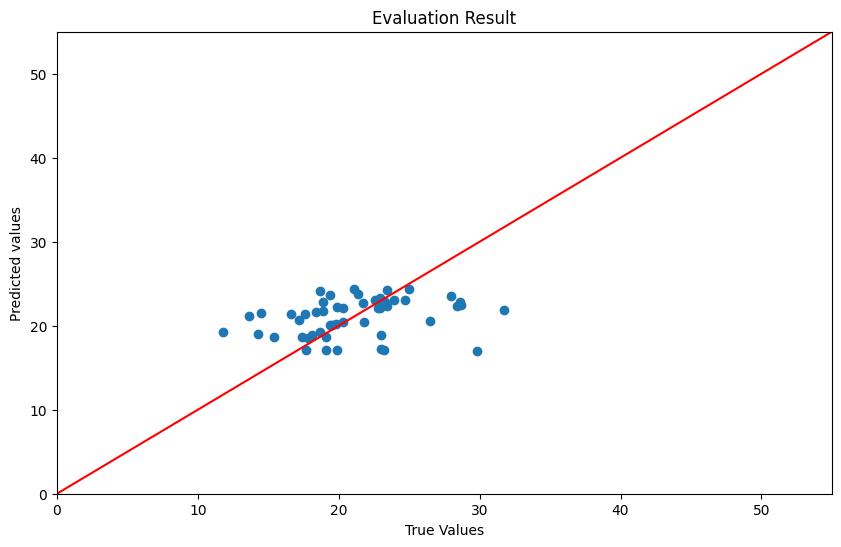

In [29]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()